
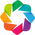

In [1]:
import holoviews as hv
hv.extension('bokeh')

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'../')

from IPython.core.debugger import set_trace as ist

In [4]:
import typyPRISM
from typyPRISM.calculate.prism.pair_correlation import pair_correlation
import numpy as np

sys = typyPRISM.System(['polymer'],kT=1.0)
sys.domain = typyPRISM.Domain(dr=0.1,length=2048)
sys.density['polymer'] = 0.9
sys.closure['polymer','polymer'] = typyPRISM.closure.PercusYevick()
sys.potential['polymer','polymer'] = typyPRISM.potential.HardSphere(sigma=1.0)


solutions1 = []
guess = np.zeros_like(sys.domain.r)
for length in [2000,500,100]:
    print('==> Solving for gaussian ring of length {}'.format(length))
    sys.omega['polymer','polymer'] = typyPRISM.omega.GaussianRing(sigma=1.0,length=length)
    PRISM = sys.createPRISM()
    result = PRISM.solve(guess)
    gr = pair_correlation(PRISM)
    solutions1.append(['ring',length,gr])
    
    guess = np.copy(PRISM.x)
    


==> Solving for gaussian ring of length 2000
0:  |F(x)| = 10.8275; step 0.00259129; tol 0.895342
1:  |F(x)| = 10.7976; step 0.00276151; tol 0.895036
2:  |F(x)| = 10.7656; step 0.00296509; tol 0.894671
3:  |F(x)| = 10.731; step 0.00321127; tol 0.894229
4:  |F(x)| = 10.6933; step 0.00351219; tol 0.893689
5:  |F(x)| = 10.6518; step 0.00388575; tol 0.893019
6:  |F(x)| = 10.6054; step 0.00436051; tol 0.892168
7:  |F(x)| = 10.5526; step 0.00497869; tol 0.891061
8:  |F(x)| = 10.4913; step 0.0058081; tol 0.889576
9:  |F(x)| = 10.4182; step 0.00696768; tol 0.887503
10:  |F(x)| = 10.3278; step 0.00867956; tol 0.884447
11:  |F(x)| = 10.2102; step 0.0113898; tol 0.87962
12:  |F(x)| = 10.0455; step 0.0161351; tol 0.871203
13:  |F(x)| = 9.78713; step 0.0257358; tol 0.854303
14:  |F(x)| = 9.30569; step 0.0492572; tol 0.813633
15:  |F(x)| = 8.47079; step 0.0900819; tol 0.74575
16:  |F(x)| = 8.05089; step 0.0507772; tol 0.812985
17:  |F(x)| = 7.92545; step 0.0164237; tol 0.872172
18:  |F(x)| = 7.85069;

In [6]:
gr_compare = []
gr_compare.append(['ring',2000,np.loadtxt('/home/tbm/elwood/N2000.csv',delimiter=',')])
gr_compare.append(['ring',500,np.loadtxt('/home/tbm/elwood/N500.csv',delimiter=',')])
gr_compare.append(['ring',100,np.loadtxt('/home/tbm/elwood/N100.csv',delimiter=',')])

In [26]:
%%opts Curve Scatter [width=500,height=400] Layout [shared_axes=False] Scatter (size=10,alpha=0.5)
%%opts Overlay [legend_position='bottom_right']
%%opts Curve Scatter [fontsize={'xlabel':14,'xlabel':14,'ylabel':14,'ticks':12}]

plots = []
colors = {}
colors[2000] = 'blue'
colors[500] = 'red'
colors[100] = 'green'
ls = {}
ls[2000] = 'solid'
ls[500] = 'dashed'
ls[100] = 'dotted'
for name,l,gr in solutions1:
    label = 'N={} (typyPRISM)                     '.format(l)
    style = {'line_dash':ls[l],'color':colors[l]}
    c1 = hv.Curve((PRISM.domain.r,gr[0,0]),label=label,extents=(0,None,12,None))(style=style)
    plots.append(c1)
    
    
markers = {}
markers[2000] = 'o'
markers[500] = '^'
markers[100] = 'd'
for name,l,gr in gr_compare:
    style = {'marker':markers[l],'color':colors[l]}
    c2 = hv.Scatter((gr[:,0],gr[:,1]),label='N={} (ref [#])'.format(l),extents=(0,None,12,None))(style=style)
    plots.append(c2)
hv.Overlay(plots).redim.label(x='r',y='g(r)')

:Overlay
   .Curve.N_equals_2000_left_parenthesis_typyPRISM_right_parenthesis                                             :Curve   [x]   (y)
   .Curve.N_equals_500_left_parenthesis_typyPRISM_right_parenthesis                                              :Curve   [x]   (y)
   .Curve.N_equals_100_left_parenthesis_typyPRISM_right_parenthesis                                              :Curve   [x]   (y)
   .Scatter.N_equals_2000_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis :Scatter   [x]   (y)
   .Scatter.N_equals_500_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis  :Scatter   [x]   (y)
   .Scatter.N_equals_100_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis  :Scatter   [x]   (y)

In [10]:
import typyPRISM
from typyPRISM.calculate.prism.pair_correlation import pair_correlation
import numpy as np

sys = typyPRISM.System(['polymer'],kT=1.0)
sys.domain = typyPRISM.Domain(dr=0.1,length=2048)
sys.density['polymer'] = 0.9
sys.closure['polymer','polymer'] = typyPRISM.closure.PercusYevick()
sys.potential['polymer','polymer'] = typyPRISM.potential.HardSphere(sigma=1.0)


solutions2 = []
guess = np.zeros_like(sys.domain.r)
for length in [2000,500,100]:
    print('==> Solving for gaussian ring of length {}'.format(length))
    sys.omega['polymer','polymer'] = typyPRISM.omega.GaussianRing(sigma=1.0,length=length)
    ringPRISM = sys.createPRISM()
    result = ringPRISM.solve(guess)
    gr = pair_correlation(ringPRISM)
    solutions2.append(['ring',length,gr])
    
    guess = np.copy(PRISM.x)
    
    print('==> Solving for gaussian linear chain of length {}'.format(length))
    sys.omega['polymer','polymer'] = typyPRISM.omega.Gaussian(sigma=1.0,length=length)
    linearPRISM = sys.createPRISM()
    result = linearPRISM.solve(guess)
    gr = pair_correlation(linearPRISM)
    solutions2.append(['linear',length,gr])
    
    guess = np.copy(PRISM.x)


==> Solving for gaussian ring of length 2000
0:  |F(x)| = 10.8275; step 0.00259129; tol 0.895342
1:  |F(x)| = 10.7976; step 0.00276151; tol 0.895036
2:  |F(x)| = 10.7656; step 0.00296509; tol 0.894671
3:  |F(x)| = 10.731; step 0.00321127; tol 0.894229
4:  |F(x)| = 10.6933; step 0.00351219; tol 0.893689
5:  |F(x)| = 10.6518; step 0.00388575; tol 0.893019
6:  |F(x)| = 10.6054; step 0.00436051; tol 0.892168
7:  |F(x)| = 10.5526; step 0.00497869; tol 0.891061
8:  |F(x)| = 10.4913; step 0.0058081; tol 0.889576
9:  |F(x)| = 10.4182; step 0.00696768; tol 0.887503
10:  |F(x)| = 10.3278; step 0.00867956; tol 0.884447
11:  |F(x)| = 10.2102; step 0.0113898; tol 0.87962
12:  |F(x)| = 10.0455; step 0.0161351; tol 0.871203
13:  |F(x)| = 9.78713; step 0.0257358; tol 0.854303
14:  |F(x)| = 9.30569; step 0.0492572; tol 0.813633
15:  |F(x)| = 8.47079; step 0.0900819; tol 0.74575
16:  |F(x)| = 8.05089; step 0.0507772; tol 0.812985
17:  |F(x)| = 7.92545; step 0.0164237; tol 0.872172
18:  |F(x)| = 7.85069;

/home/tbm/software/anaconda3/4.4.0/envs/analyze/lib/python3.6/site-packages/scipy/optimize/nonlin.py:474: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


In [14]:
%%opts Curve Scatter [width=600,height=400] Layout [shared_axes=False] Scatter (size=10,alpha=0.5)
%%opts Overlay [legend_position='bottom_right']

plots = []
colors = {}
colors[2000] = 'blue'
colors[500] = 'red'
colors[100] = 'green'
for name,l,gr in solutions2:
    label = '{}: N={} (typyPRISM)'.format(name,l)
    if name =='ring':
        style = {'line_dash':'solid','color':colors[l]}
        c1 = hv.Curve((PRISM.domain.r,gr[0,0]),label=label,extents=(0,None,12,None))(style=style)
    else:
        style = {'line_dash':'dashed','color':colors[l]}
        c1 = hv.Curve((PRISM.domain.r,gr[0,0]),label=label,extents=(0,None,12,None))(style=style)
    plots.append(c1)
    

markers = {}
markers[2000] = 'o'
markers[500] = '^'
markers[100] = 'd'
for name,l,gr in gr_compare:
    style = {'marker':markers[l],'color':colors[l]}
    c2 = hv.Scatter((gr[:,0],gr[:,1]),label='ring: N={} (ref [#])'.format(l),extents=(0,None,12,None))(style=style)
    plots.append(c2)
    
O = hv.Overlay(plots).redim.label(x='r',y='g(r)')
O

:Overlay
   .Curve.Ring_colon_N_equals_2000_left_parenthesis_typyPRISM_right_parenthesis                                             :Curve   [x]   (y)
   .Curve.Linear_colon_N_equals_2000_left_parenthesis_typyPRISM_right_parenthesis                                           :Curve   [x]   (y)
   .Curve.Ring_colon_N_equals_500_left_parenthesis_typyPRISM_right_parenthesis                                              :Curve   [x]   (y)
   .Curve.Linear_colon_N_equals_500_left_parenthesis_typyPRISM_right_parenthesis                                            :Curve   [x]   (y)
   .Curve.Ring_colon_N_equals_100_left_parenthesis_typyPRISM_right_parenthesis                                              :Curve   [x]   (y)
   .Curve.Linear_colon_N_equals_100_left_parenthesis_typyPRISM_right_parenthesis                                            :Curve   [x]   (y)
   .Scatter.Ring_colon_N_equals_2000_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis :Scatter   [x]   (y)
   .Scatter.Ring_colon_N_equals_500_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis  :Scatter   [x]   (y)
   .Scatter.Ring_colon_N_equals_100_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis  :Scatter   [x]   (y)